In [10]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
dataset = pd.read_csv(r"D:\FMCG\extended_fmcg_demand_forecasting.csv")

In [13]:
dataset.head()

,Date,Product_Category,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level
0,2022-01-01,Household,1583,5.190661,0,Urban,5,9.299281,9,207
1,2022-01-02,Personal Care,1103,8.949596,0,Urban,6,13.274109,5,253
2,2022-01-03,Dairy,455,4.867987,0,Rural,0,13.302265,9,245
3,2022-01-04,Personal Care,1107,16.968596,1,Urban,1,10.056158,5,265
4,2022-01-05,Personal Care,1447,4.309673,1,Rural,2,3.562862,8,334


In [14]:
dataset_copy = dataset.copy()

In [18]:
dataset_copy.drop(columns=["Date"] , inplace=True)

In [19]:
dataset_copy.head()

,Product_Category,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level
0,Household,1583,5.190661,0,Urban,5,9.299281,9,207
1,Personal Care,1103,8.949596,0,Urban,6,13.274109,5,253
2,Dairy,455,4.867987,0,Rural,0,13.302265,9,245
3,Personal Care,1107,16.968596,1,Urban,1,10.056158,5,265
4,Personal Care,1447,4.309673,1,Rural,2,3.562862,8,334


In [20]:
dataset_copy["Store_Location"]

0         Urban
1         Urban
2         Rural
3         Urban
4         Rural
         ...   
995    Suburban
996       Urban
997    Suburban
998    Suburban
999       Urban
Name: Store_Location, Length: 1000, dtype: object

In [21]:
dataset_copy["Store_Location"].value_counts()

Store_Location
Urban       342
Rural       338
Suburban    320
Name: count, dtype: int64

In [22]:
dataset_copy['Store_Location'] = dataset_copy['Store_Location'].map({
    'Urban': 2,
    'Rural': 0,
    'Suburban': 1
})


In [23]:
dataset_copy["Store_Location"]


0      2
1      2
2      0
3      2
4      0
      ..
995    1
996    2
997    1
998    1
999    2
Name: Store_Location, Length: 1000, dtype: int64

In [24]:
dataset_copy["Store_Location"].value_counts()

Store_Location
2    342
0    338
1    320
Name: count, dtype: int64

In [26]:
dataset_copy.head()

,Product_Category,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level
0,Household,1583,5.190661,0,2,5,9.299281,9,207
1,Personal Care,1103,8.949596,0,2,6,13.274109,5,253
2,Dairy,455,4.867987,0,0,0,13.302265,9,245
3,Personal Care,1107,16.968596,1,2,1,10.056158,5,265
4,Personal Care,1447,4.309673,1,0,2,3.562862,8,334


UNIVARIATE ANALYSIS

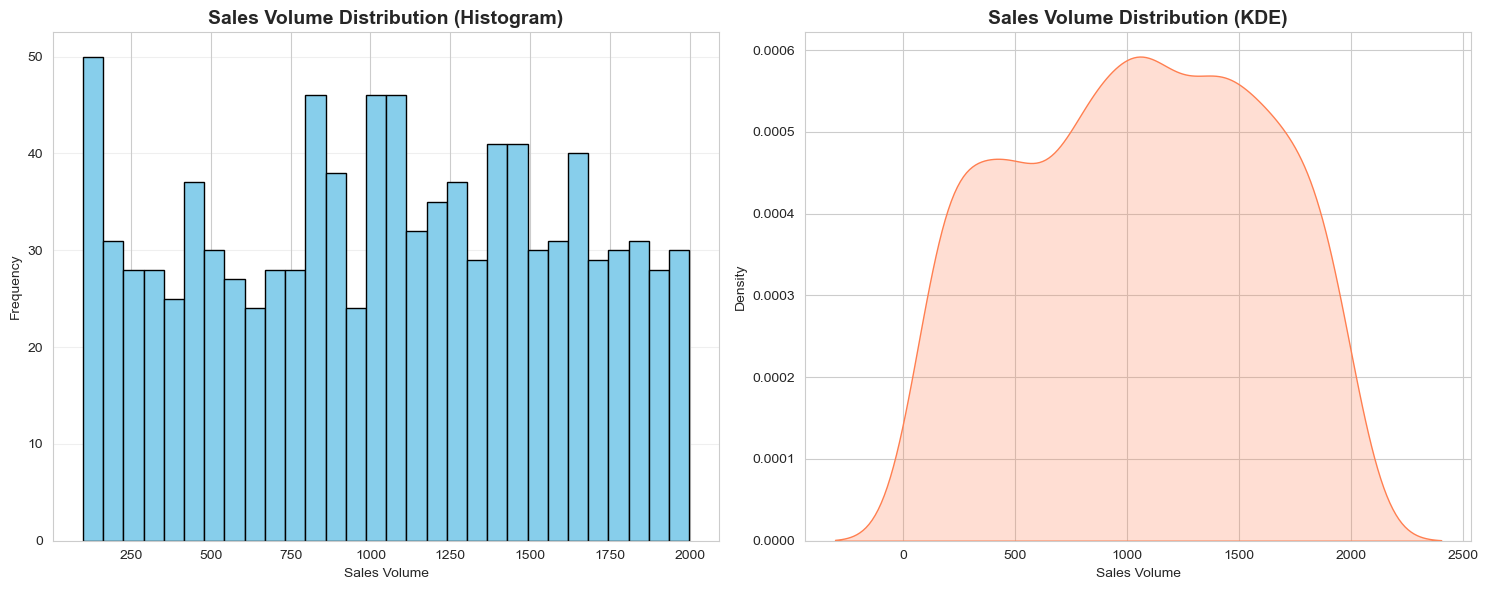

In [38]:

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

# Subplot 1: Histogram (Bar-style plot for continuous data)
plt.subplot(1, 2, 1)
plt.hist(dataset_copy['Sales_Volume'], bins=30, color='skyblue', edgecolor='black')
plt.title('Sales Volume Distribution (Histogram)', fontsize=14, fontweight='bold')
plt.xlabel('Sales Volume')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

# Subplot 2: KDE Plot (Smooth distribution)
plt.subplot(1, 2, 2)
sns.kdeplot(data=dataset_copy['Sales_Volume'], fill=True, color='coral')
plt.title('Sales Volume Distribution (KDE)', fontsize=14, fontweight='bold')
plt.xlabel('Sales Volume')
plt.ylabel('Density')

plt.tight_layout()
plt.show()



In [39]:
# Print summary statistics
print("Sales Volume Summary Statistics:")
print(dataset_copy['Sales_Volume'].describe())

Sales Volume Summary Statistics:
count    1000.000000
mean     1048.781000
std       539.688298
min       101.000000
25%       591.750000
50%      1064.500000
75%      1489.000000
max      1997.000000
Name: Sales_Volume, dtype: float64


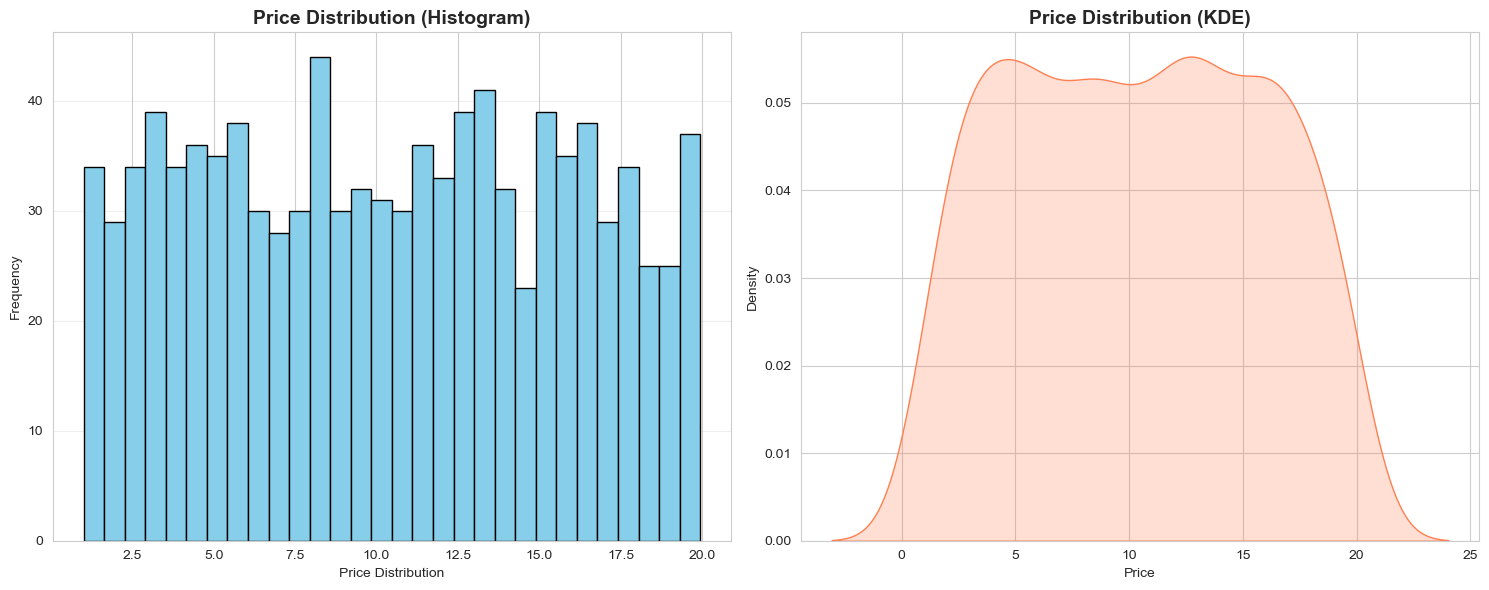

In [40]:

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

# Subplot 1: Histogram (Bar-style plot for continuous data)
plt.subplot(1, 2, 1)
plt.hist(dataset_copy['Price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution (Histogram)', fontsize=14, fontweight='bold')
plt.xlabel('Price Distribution')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

# Subplot 2: KDE Plot (Smooth distribution)
plt.subplot(1, 2, 2)
sns.kdeplot(data=dataset_copy['Price'], fill=True, color='coral')
plt.title('Price Distribution (KDE)', fontsize=14, fontweight='bold')
plt.xlabel('Price')
plt.ylabel('Density')

plt.tight_layout()
plt.show()



In [41]:
# Print summary statistics
print("Price Summary Statistics:")
print(dataset_copy['Price'].describe())

Price Summary Statistics:
count    1000.000000
mean       10.362358
std         5.420627
min         1.003580
25%         5.541108
50%        10.404366
75%        15.054035
max        19.944485
Name: Price, dtype: float64


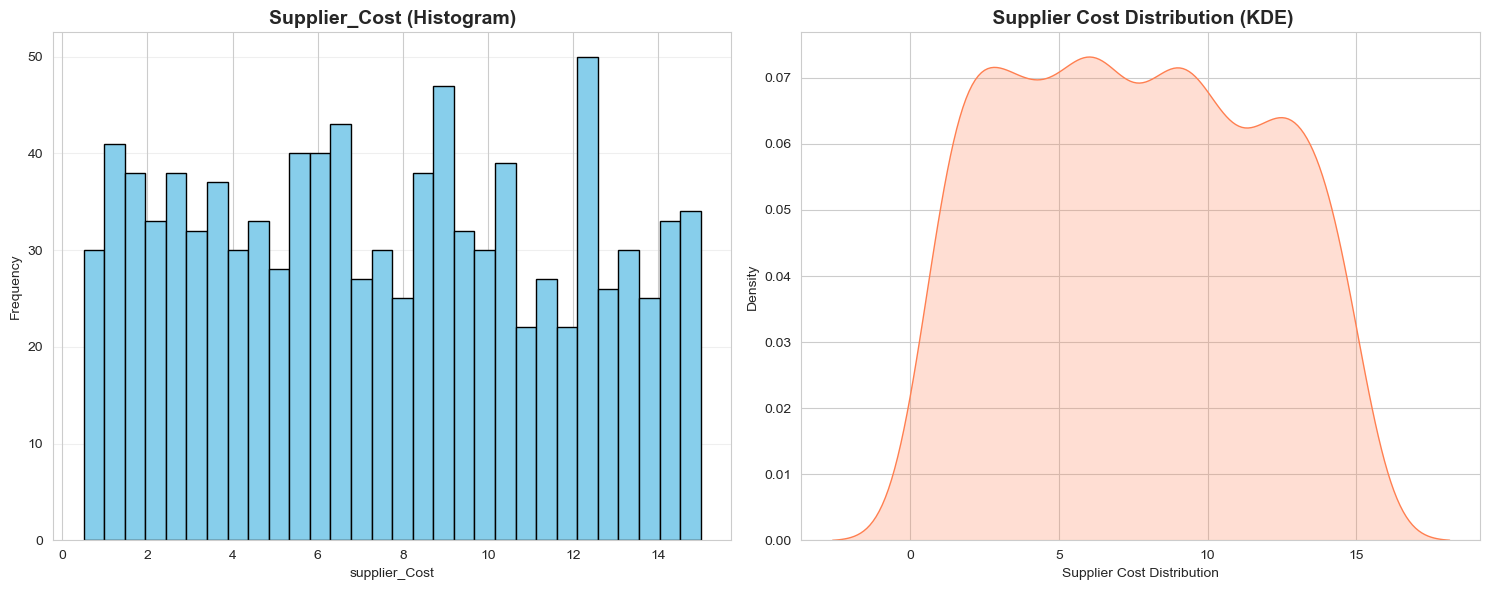

In [42]:

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

# Subplot 1: Histogram (Bar-style plot for continuous data)
plt.subplot(1, 2, 1)
plt.hist(dataset_copy['Supplier_Cost'], bins=30, color='skyblue', edgecolor='black')
plt.title('Supplier_Cost (Histogram)', fontsize=14, fontweight='bold')
plt.xlabel('supplier_Cost')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

# Subplot 2: KDE Plot (Smooth distribution)
plt.subplot(1, 2, 2)
sns.kdeplot(data=dataset_copy['Supplier_Cost'], fill=True, color='coral')
plt.title(' Supplier Cost Distribution (KDE)', fontsize=14, fontweight='bold')
plt.xlabel('Supplier Cost Distribution')
plt.ylabel('Density')

plt.tight_layout()
plt.show()



In [43]:
# Print summary statistics
print("Supplier_Cost Summary Statistics:")
print(dataset_copy['Price'].describe())

Supplier_Cost Summary Statistics:
count    1000.000000
mean       10.362358
std         5.420627
min         1.003580
25%         5.541108
50%        10.404366
75%        15.054035
max        19.944485
Name: Price, dtype: float64


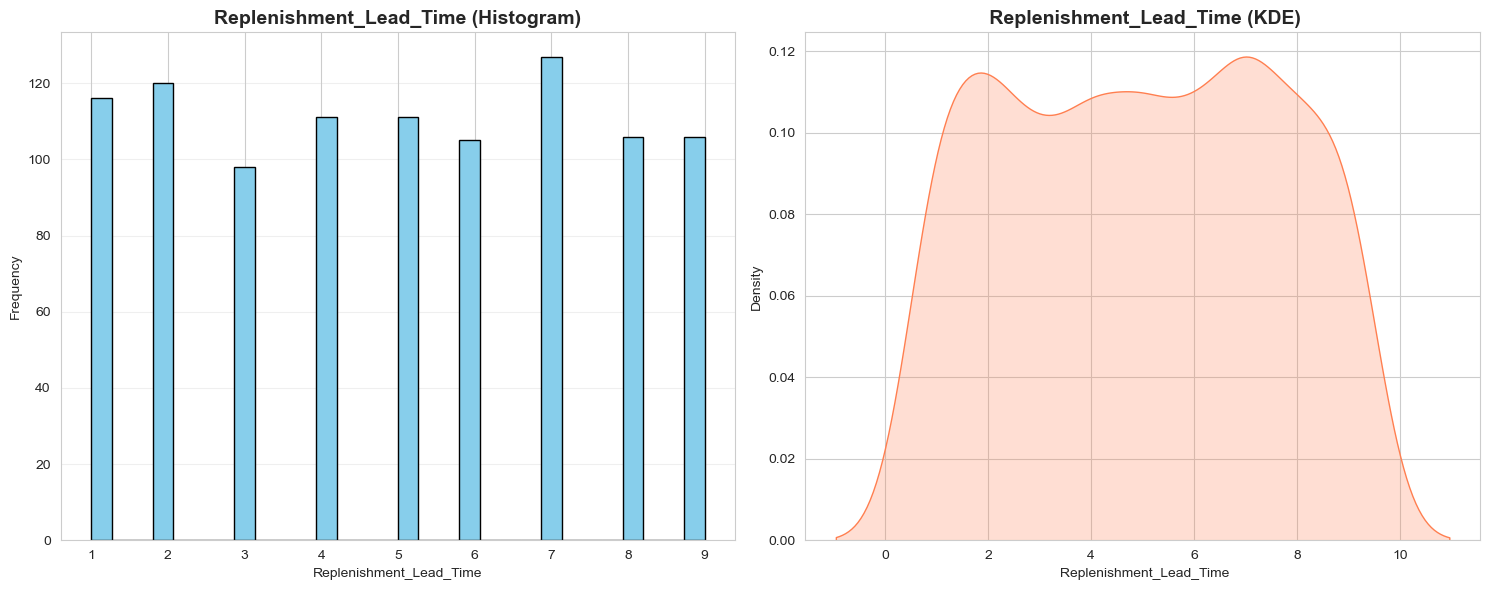

In [44]:

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))

# Subplot 1: Histogram (Bar-style plot for continuous data)
plt.subplot(1, 2, 1)
plt.hist(dataset_copy['Replenishment_Lead_Time'], bins=30, color='skyblue', edgecolor='black')
plt.title('Replenishment_Lead_Time (Histogram)', fontsize=14, fontweight='bold')
plt.xlabel('Replenishment_Lead_Time')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)

# Subplot 2: KDE Plot (Smooth distribution)
plt.subplot(1, 2, 2)
sns.kdeplot(data=dataset_copy['Replenishment_Lead_Time'], fill=True, color='coral')
plt.title(' Replenishment_Lead_Time (KDE)', fontsize=14, fontweight='bold')
plt.xlabel(' Replenishment_Lead_Time')
plt.ylabel('Density')

plt.tight_layout()
plt.show()



In [45]:
# Print summary statistics
print(" Replenishment_Lead_Time:")
print(dataset_copy['Replenishment_Lead_Time'].describe())


 Replenishment_Lead_Time:
count    1000.000000
mean        4.970000
std         2.589944
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max         9.000000
Name: Replenishment_Lead_Time, dtype: float64


NO MUCH OUTLIER DETECTED FROM UNIVARIATE ANALYSIS

BIVARIATE ANALYSIS

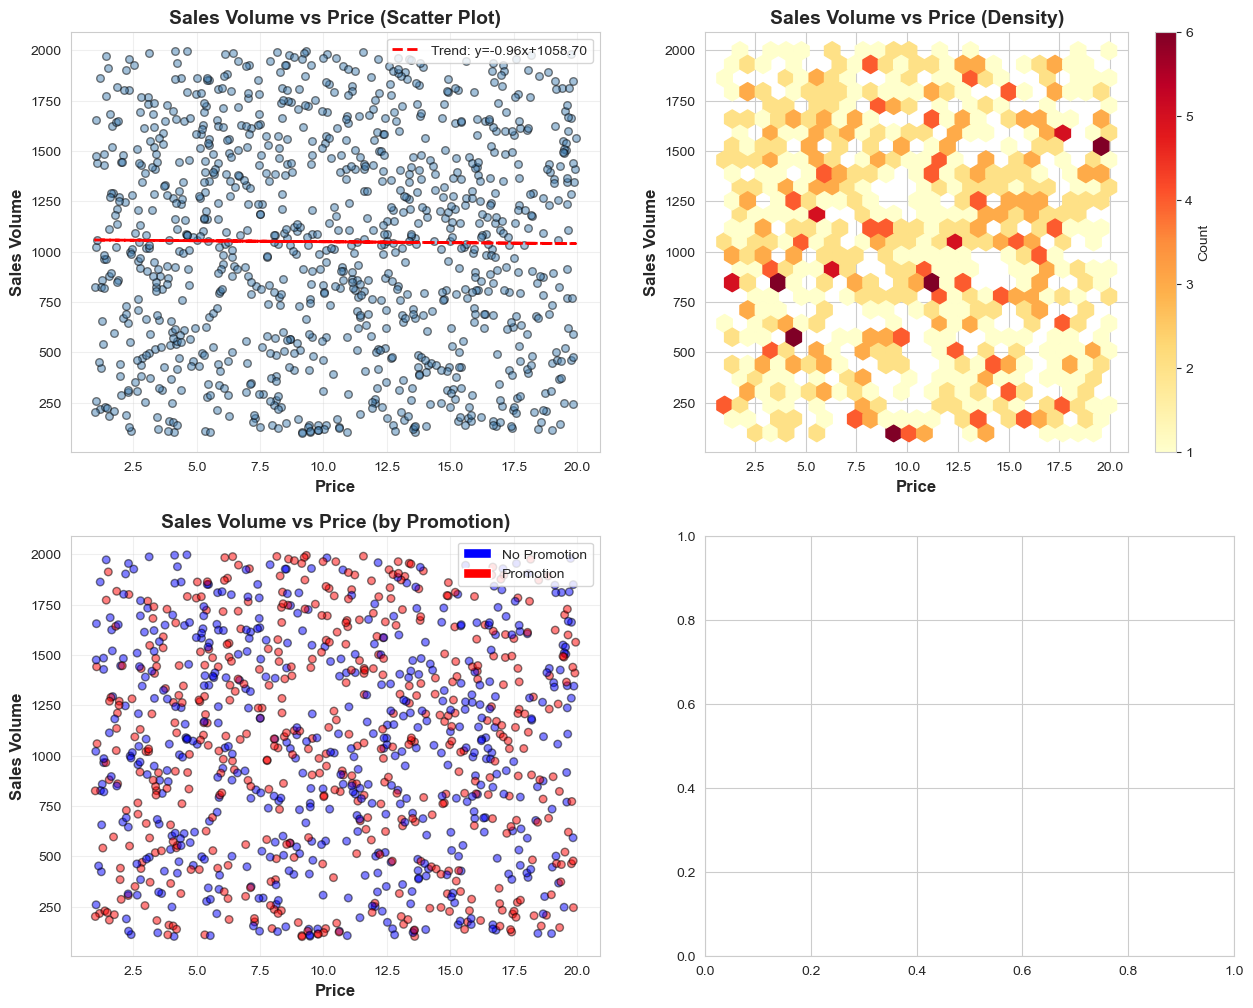

In [46]:

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter Plot
axes[0, 0].scatter(dataset_copy['Price'], dataset_copy['Sales_Volume'], 
                   alpha=0.5, color='steelblue', edgecolor='black', s=30)
axes[0, 0].set_xlabel('Price', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Sales Volume', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Sales Volume vs Price (Scatter Plot)', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(dataset_copy['Price'], dataset_copy['Sales_Volume'], 1)
p = np.poly1d(z)
axes[0, 0].plot(dataset_copy['Price'], p(dataset_copy['Price']), 
                "r--", linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')
axes[0, 0].legend()



# 2. Hexbin Plot (for density visualization)
hb = axes[0, 1].hexbin(dataset_copy['Price'], dataset_copy['Sales_Volume'], 
                        gridsize=25, cmap='YlOrRd', mincnt=1)
axes[0, 1].set_xlabel('Price', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Sales Volume', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Sales Volume vs Price (Density)', fontsize=14, fontweight='bold')
plt.colorbar(hb, ax=axes[0, 1], label='Count')



# 3. Scatter Plot colored by Promotion
colors = dataset_copy['Promotion'].map({0: 'blue', 1: 'red'})
axes[1, 0].scatter(dataset_copy['Price'], dataset_copy['Sales_Volume'], 
                   c=colors, alpha=0.5, edgecolor='black', s=30)
axes[1, 0].set_xlabel('Price', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Sales Volume', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Sales Volume vs Price (by Promotion)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)


from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', label='No Promotion'),
                   Patch(facecolor='red', label='Promotion')]
axes[1, 0].legend(handles=legend_elements)



CORRELATION

In [50]:

correlation = dataset_copy['Price'].corr(dataset_copy['Sales_Volume'])
axes[1, 1].text(0.5, 0.7, f'Correlation Coefficient:\n{correlation:.4f}', 
                ha='center', va='center', fontsize=16, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Add interpretation
if correlation < -0.3:
    interpretation = "Strong Negative Correlation\n(Higher Price → Lower Sales)"
elif correlation < -0.1:
    interpretation = "Weak Negative Correlation"
elif correlation < 0.1:
    interpretation = "No Correlation"
elif correlation < 0.3:
    interpretation = "Weak Positive Correlation"
else:
    interpretation = "Strong Positive Correlation\n(Higher Price → Higher Sales)"
    
axes[1, 1].text(0.5, 0.4, interpretation, 
                ha='center', va='center', fontsize=12, style='italic')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()



<Figure size 640x480 with 0 Axes>

STATISTICS

In [51]:

print("=" * 60)
print("SALES VOLUME vs PRICE ANALYSIS")
print("=" * 60)
print(f"\nCorrelation: {correlation:.4f}")
print(f"\nPrice Statistics:")
print(dataset_copy['Price'].describe())
print(f"\nSales Volume Statistics:")
print(dataset_copy['Sales_Volume'].describe())

SALES VOLUME vs PRICE ANALYSIS

Correlation: -0.0096

Price Statistics:
count    1000.000000
mean       10.362358
std         5.420627
min         1.003580
25%         5.541108
50%        10.404366
75%        15.054035
max        19.944485
Name: Price, dtype: float64

Sales Volume Statistics:
count    1000.000000
mean     1048.781000
std       539.688298
min       101.000000
25%       591.750000
50%      1064.500000
75%      1489.000000
max      1997.000000
Name: Sales_Volume, dtype: float64


In [52]:
dataset_copy.isna().sum()

Product_Category           0
Sales_Volume               0
Price                      0
Promotion                  0
Store_Location             0
Weekday                    0
Supplier_Cost              0
Replenishment_Lead_Time    0
Stock_Level                0
dtype: int64

CATEGORICAL ENCODING

In [53]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False, drop='first')  

encoded_categories = encoder.fit_transform(dataset_copy[['Product_Category']])
category_names = encoder.get_feature_names_out(['Product_Category'])

# Create DataFrame with encoded columns
encoded_df = pd.DataFrame(encoded_categories, columns=category_names, index=dataset_copy.index)
dataset_encoded = pd.concat([dataset_copy.drop('Product_Category', axis=1), encoded_df], axis=1)

print("Encoded columns:", category_names)
dataset_encoded.head()

Encoded columns: ['Product_Category_Dairy' 'Product_Category_Household'
 'Product_Category_Personal Care' 'Product_Category_Snacks']


,Sales_Volume,Price,Promotion,Store_Location,Weekday,Supplier_Cost,Replenishment_Lead_Time,Stock_Level,Product_Category_Dairy,Product_Category_Household,Product_Category_Personal Care,Product_Category_Snacks
0,1583,5.190661,0,2,5,9.299281,9,207,0.0,1.0,0.0,0.0
1,1103,8.949596,0,2,6,13.274109,5,253,0.0,0.0,1.0,0.0
2,455,4.867987,0,0,0,13.302265,9,245,1.0,0.0,0.0,0.0
3,1107,16.968596,1,2,1,10.056158,5,265,0.0,0.0,1.0,0.0
4,1447,4.309673,1,0,2,3.562862,8,334,0.0,0.0,1.0,0.0


In [54]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Fit and transform the Product_Category column
dataset_copy['Product_Category_Encoded'] = label_encoder.fit_transform(dataset_copy['Product_Category'])

# See the mapping
print("Original categories:", dataset_copy['Product_Category'].unique())
print("Encoded values:", dataset_copy['Product_Category_Encoded'].unique())
print("\nMapping:")
for i, category in enumerate(label_encoder.classes_):
    print(f"  {category} -> {i}")

# Display sample
print("\nSample data:")
print(dataset_copy[['Product_Category', 'Product_Category_Encoded']].head(10))


Original categories: ['Household' 'Personal Care' 'Dairy' 'Snacks' 'Beverages']
Encoded values: [2 3 1 4 0]

Mapping:
  Beverages -> 0
  Dairy -> 1
  Household -> 2
  Personal Care -> 3
  Snacks -> 4

Sample data:
  Product_Category  Product_Category_Encoded
0        Household                         2
1    Personal Care                         3
2            Dairy                         1
3    Personal Care                         3
4    Personal Care                         3
5           Snacks                         4
6            Dairy                         1
7            Dairy                         1
8            Dairy                         1
9    Personal Care                         3


In [55]:
import pickle

# Save the encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# Load the encoder later
with open('label_encoder.pkl', 'rb') as f:
    loaded_encoder = pickle.load(f)

TIME SERIES ANALYSIS

Date range: 2022-01-01 00:00:00 to 2024-09-26 00:00:00
Total days: 999


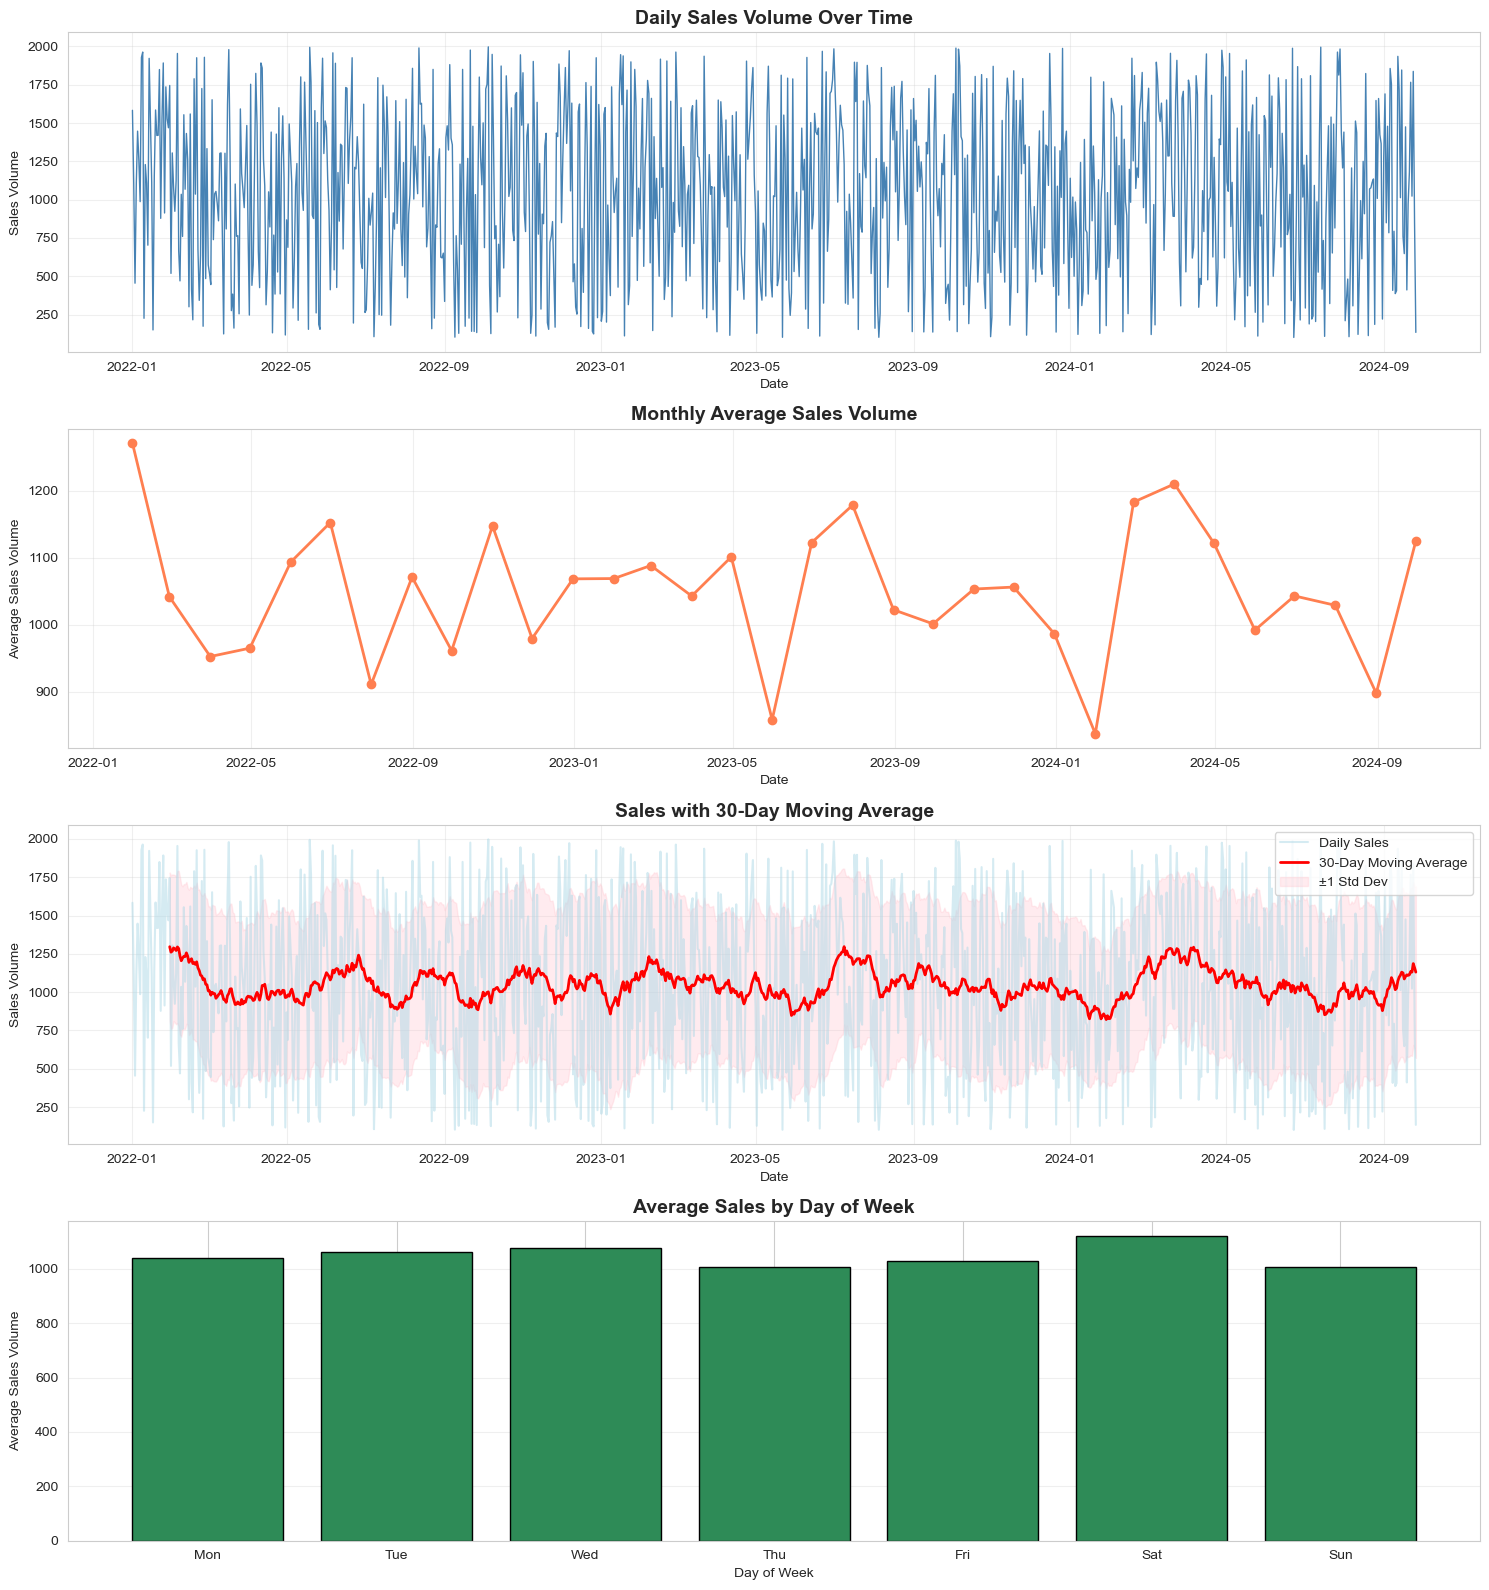

In [58]:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

# Convert Date to datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Sort by date
dataset = dataset.sort_values('Date')

# Set Date as index
ts_data = dataset.set_index('Date')

print("Date range:", ts_data.index.min(), "to", ts_data.index.max())
print("Total days:", (ts_data.index.max() - ts_data.index.min()).days)



daily_sales = ts_data['Sales_Volume'].resample('D').sum()

# TIME SERIES ANALYSIS

fig, axes = plt.subplots(4, 1, figsize=(15, 16))

# Plot 1: Overall Sales Trend
axes[0].plot(daily_sales.index, daily_sales.values, color='steelblue', linewidth=1)
axes[0].set_title('Daily Sales Volume Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Sales Volume')
axes[0].grid(True, alpha=0.3)

# Plot 2: Monthly Average Sales
monthly_sales = ts_data['Sales_Volume'].resample('M').mean()
axes[1].plot(monthly_sales.index, monthly_sales.values, marker='o', color='coral', linewidth=2)
axes[1].set_title('Monthly Average Sales Volume', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average Sales Volume')
axes[1].grid(True, alpha=0.3)

# Plot 3: Rolling Average (30-day window)
rolling_mean = daily_sales.rolling(window=30).mean()
rolling_std = daily_sales.rolling(window=30).std()
axes[2].plot(daily_sales.index, daily_sales.values, color='lightblue', alpha=0.5, label='Daily Sales')
axes[2].plot(rolling_mean.index, rolling_mean.values, color='red', linewidth=2, label='30-Day Moving Average')
axes[2].fill_between(rolling_mean.index, 
                      rolling_mean - rolling_std, 
                      rolling_mean + rolling_std, 
                      color='pink', alpha=0.3, label='±1 Std Dev')
axes[2].set_title('Sales with 30-Day Moving Average', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Sales Volume')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# Plot 4: Sales by Weekday
weekday_sales = ts_data.groupby('Weekday')['Sales_Volume'].mean().sort_index()
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[3].bar(range(7), weekday_sales.values, color='seagreen', edgecolor='black')
axes[3].set_xticks(range(7))
axes[3].set_xticklabels(weekday_names)
axes[3].set_title('Average Sales by Day of Week', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Day of Week')
axes[3].set_ylabel('Average Sales Volume')
axes[3].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()





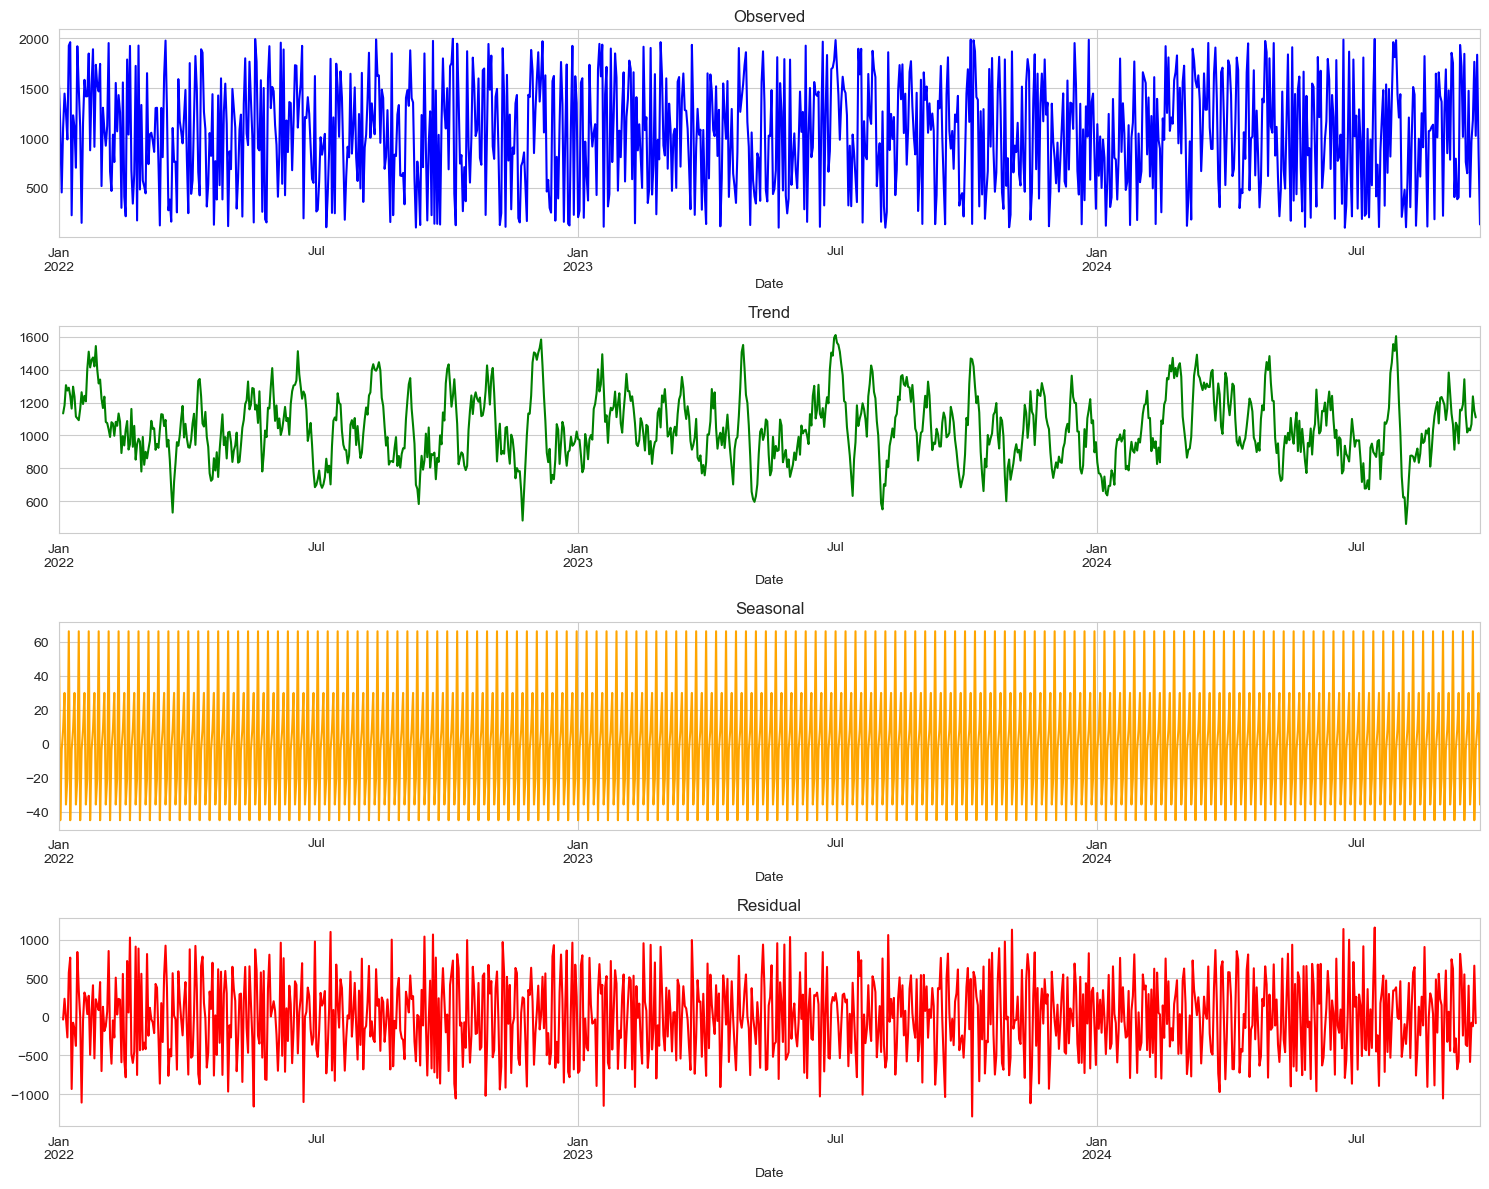

In [60]:
# Decompose the time series (Trend, Seasonal, Residual)

decomposition = seasonal_decompose(daily_sales.dropna(), model='additive', period=7)  # Weekly seasonality

fig, axes = plt.subplots(4, 1, figsize=(15, 12))
decomposition.observed.plot(ax=axes[0], title='Observed', color='blue')
decomposition.trend.plot(ax=axes[1], title='Trend', color='green')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal', color='orange')
decomposition.resid.plot(ax=axes[3], title='Residual', color='red')
plt.tight_layout()
plt.show()



AUTOCORRELATION



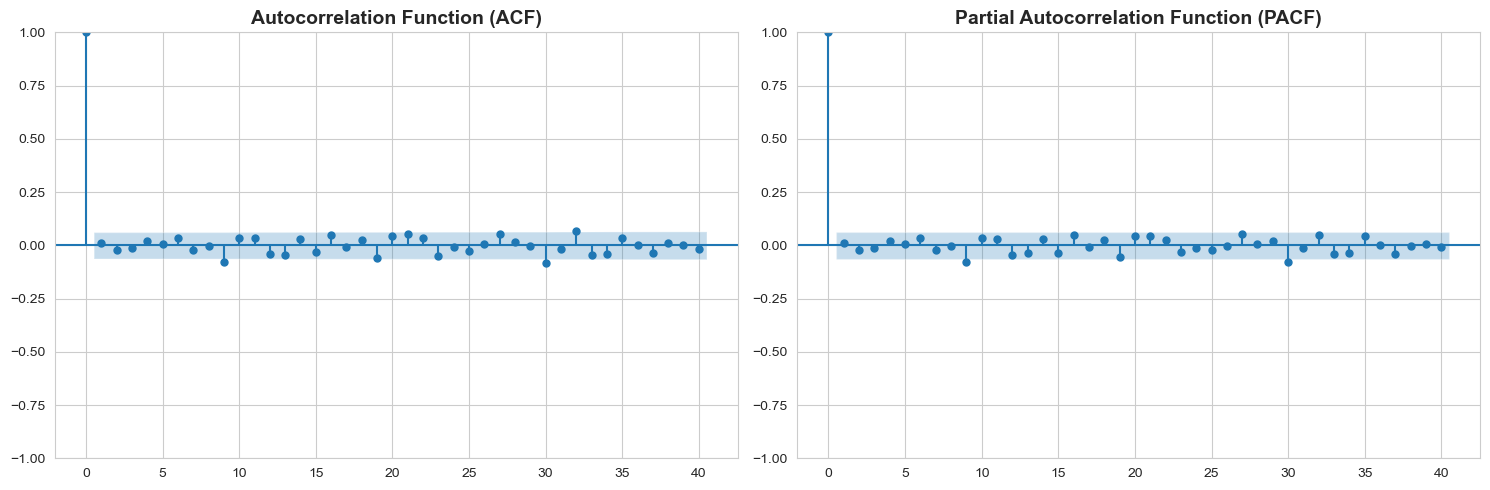


TIME SERIES SUMMARY STATISTICS

Total Sales: 1,048,781
Average Daily Sales: 1,048.78
Median Daily Sales: 1,064.50
Std Dev: 539.69
Max Daily Sales: 1,997
Min Daily Sales: 101

MONTHLY TRENDS
Date
2022-01-31    1271.483871
2022-02-28    1041.857143
2022-03-31     952.387097
2022-04-30     964.900000
2022-05-31    1093.548387
2022-06-30    1152.733333
2022-07-31     910.612903
2022-08-31    1071.258065
2022-09-30     961.100000
2022-10-31    1147.677419
2022-11-30     979.333333
2022-12-31    1068.516129
2023-01-31    1068.967742
2023-02-28    1088.464286
2023-03-31    1042.838710
2023-04-30    1101.333333
2023-05-31     857.870968
2023-06-30    1122.866667
2023-07-31    1178.741935
2023-08-31    1022.290323
2023-09-30    1001.233333
2023-10-31    1053.290323
2023-11-30    1056.233333
2023-12-31     986.290323
2024-01-31     837.000000
2024-02-29    1183.241379
2024-03-31    1210.451613
2024-04-30    1121.600000
2024-05-31     991.870968
2024-06-30    1043.000000
2024-07-31    1028.93548

In [61]:


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# ACF (Autocorrelation Function)
plot_acf(daily_sales.dropna(), lags=40, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF)', fontsize=14, fontweight='bold')

# PACF (Partial Autocorrelation Function)
plot_pacf(daily_sales.dropna(), lags=40, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function (PACF)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()



print("\n" + "="*60)
print("TIME SERIES SUMMARY STATISTICS")
print("="*60)
print(f"\nTotal Sales: {daily_sales.sum():,.0f}")
print(f"Average Daily Sales: {daily_sales.mean():,.2f}")
print(f"Median Daily Sales: {daily_sales.median():,.2f}")
print(f"Std Dev: {daily_sales.std():,.2f}")
print(f"Max Daily Sales: {daily_sales.max():,.0f}")
print(f"Min Daily Sales: {daily_sales.min():,.0f}")

print("\n" + "="*60)
print("MONTHLY TRENDS")
print("="*60)
print(monthly_sales)

print("\n" + "="*60)
print("WEEKDAY PATTERNS")
print("="*60)
for i, day in enumerate(weekday_names):
    print(f"{day}: {weekday_sales.iloc[i]:,.2f}")

MODEL TRAINING

In [68]:
# Create a processed copy of the dataset
dataset_processed = dataset.copy()

# 1. Encode Store_Location
dataset_processed['Store_Location'] = dataset_processed['Store_Location'].map({
    'Urban': 2,
    'Rural': 0,
    'Suburban': 1
})

# 2. Encode Product_Category
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset_processed['Product_Category'] = le.fit_transform(dataset_processed['Product_Category'])

# Check encoding worked
print("Unique Store_Location values:", dataset_processed['Store_Location'].unique())
print("Unique Product_Category values:", dataset_processed['Product_Category'].unique())


Unique Store_Location values: [2 0 1]
Unique Product_Category values: [2 3 1 4 0]


In [69]:
# Sort by date
dataset_processed = dataset_processed.sort_values('Date').reset_index(drop=True)

# Define features
feature_columns = ['Product_Category', 'Price', 'Promotion', 'Store_Location', 
                   'Weekday', 'Supplier_Cost', 'Replenishment_Lead_Time', 'Stock_Level']

X = dataset_processed[feature_columns]
y = dataset_processed['Sales_Volume']

# Time-based split
split_index = int(len(dataset_processed) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Training samples: 800
Test samples: 200


In [70]:
# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import numpy as np


In [71]:
print("\n" + "="*60)
print("LINEAR REGRESSION MODEL")
print("="*60)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"\nLinear Regression Performance:")
print(f"RMSE: {rmse_lr:.2f}")
print(f"MAE: {mae_lr:.2f}")
print(f"R² Score: {r2_lr:.4f}")




LINEAR REGRESSION MODEL

Linear Regression Performance:
RMSE: 556.19
MAE: 475.82
R² Score: -0.0064


In [72]:
print("\n" + "="*60)
print("RANDOM FOREST MODEL")
print("="*60)

# Train the model
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"\nRandom Forest Performance:")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAE: {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.4f}")




RANDOM FOREST MODEL

Random Forest Performance:
RMSE: 581.39
MAE: 498.16
R² Score: -0.0997


In [73]:
print("\n" + "="*60)
print("XGBOOST MODEL")
print("="*60)

# Train the model
xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate metrics
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"\nXGBoost Performance:")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"MAE: {mae_xgb:.2f}")
print(f"R² Score: {r2_xgb:.4f}")




XGBOOST MODEL

XGBoost Performance:
RMSE: 631.53
MAE: 526.42
R² Score: -0.2975



MODEL COMPARISON
            Model       RMSE        MAE  R² Score
Linear Regression 556.186992 475.817618 -0.006400
    Random Forest 581.390787 498.159912 -0.099677
          XGBoost 631.528726 526.420654 -0.297523


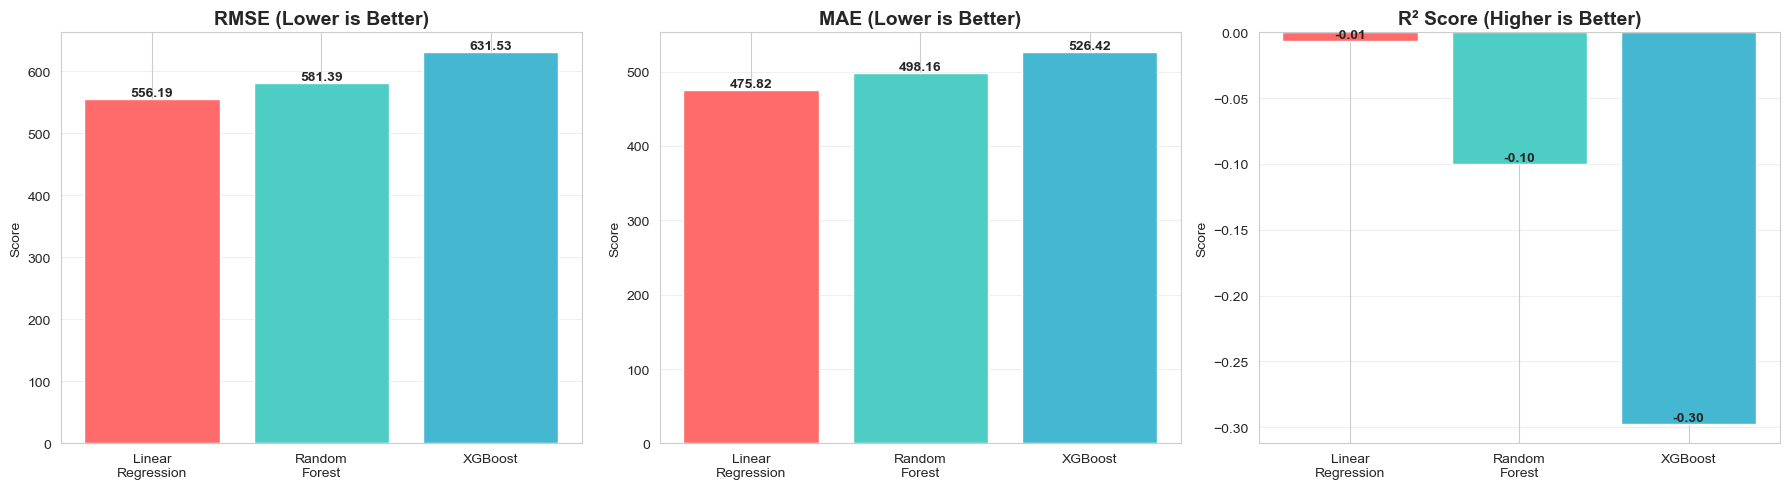


Best Model: Linear Regression with R² = -0.0064


In [74]:
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)


comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb],
    'MAE': [mae_lr, mae_rf, mae_xgb],
    'R² Score': [r2_lr, r2_rf, r2_xgb]
})

print(comparison.to_string(index=False))

# Visualize comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models = ['Linear\nRegression', 'Random\nForest', 'XGBoost']
metrics = [
    [rmse_lr, rmse_rf, rmse_xgb],
    [mae_lr, mae_rf, mae_xgb],
    [r2_lr, r2_rf, r2_xgb]
]
titles = ['RMSE (Lower is Better)', 'MAE (Lower is Better)', 'R² Score (Higher is Better)']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, ax in enumerate(axes):
    bars = ax.bar(models, metrics[i], color=colors)
    ax.set_title(titles[i], fontsize=14, fontweight='bold')
    ax.set_ylabel('Score')
    ax.grid(axis='y', alpha=0.3)
    
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Find best model
best_model_idx = comparison['R² Score'].idxmax()
best_model_name = comparison.loc[best_model_idx, 'Model']
print(f"\nBest Model: {best_model_name} with R² = {comparison.loc[best_model_idx, 'R² Score']:.4f}")

MODEL SELECTION

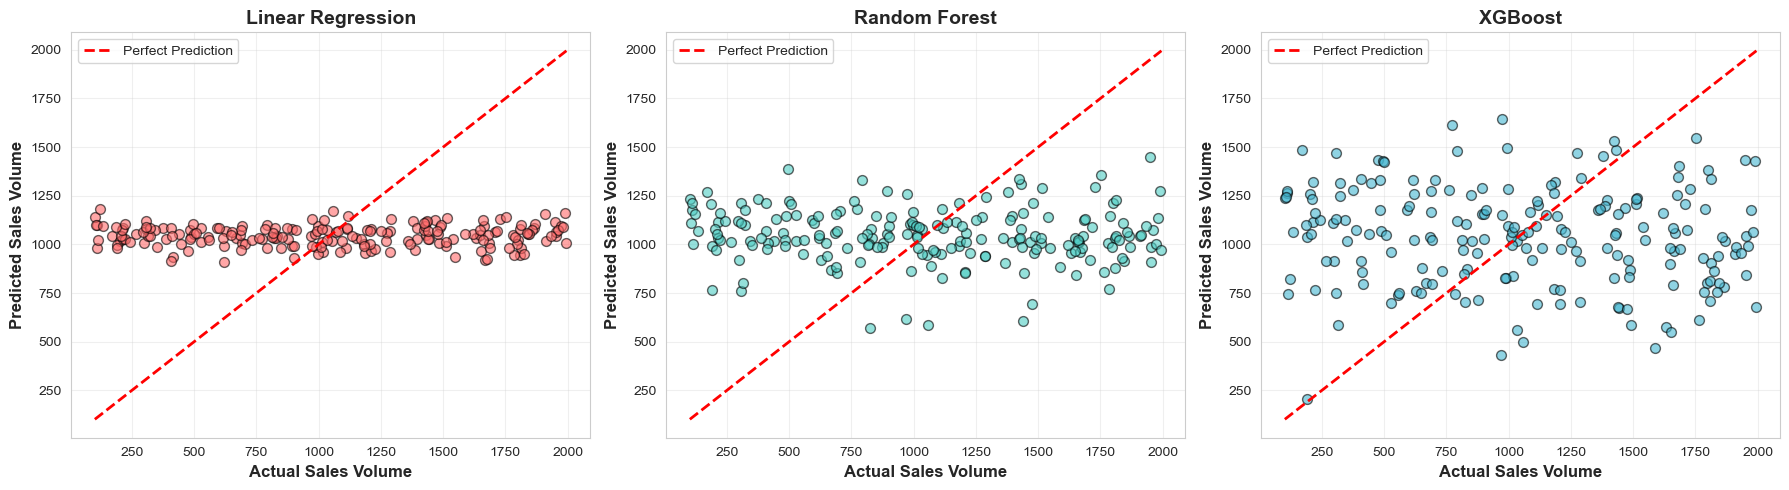

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Colors for each model
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

# Plot for each model
models_predictions = {
    'Linear Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

for i, (model_name, y_pred) in enumerate(models_predictions.items()):
    axes[i].scatter(y_test, y_pred, alpha=0.6, color=colors[i], edgecolor='black', s=50)
    
    # Perfect prediction line
    axes[i].plot([y_test.min(), y_test.max()], 
                 [y_test.min(), y_test.max()], 
                 'r--', lw=2, label='Perfect Prediction')
    
    axes[i].set_xlabel('Actual Sales Volume', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Predicted Sales Volume', fontsize=12, fontweight='bold')
    axes[i].set_title(f'{model_name}', fontsize=14, fontweight='bold')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

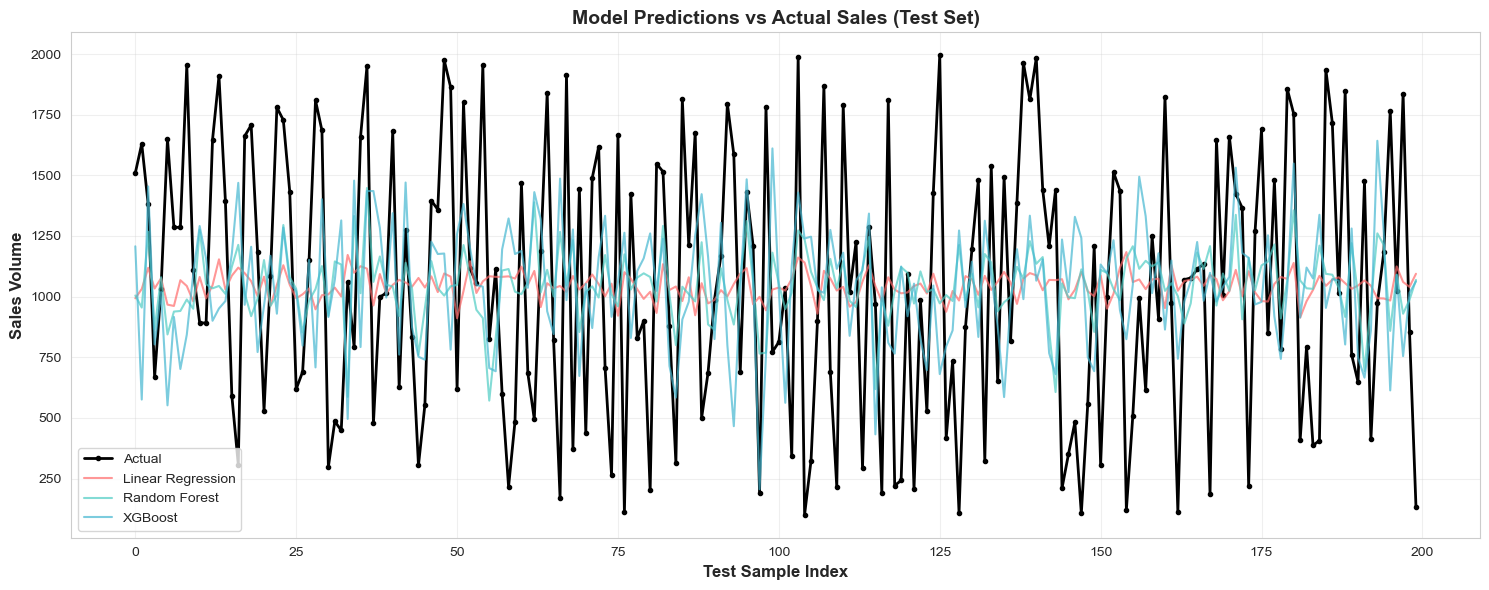

In [78]:
# Plot predictions over time
plt.figure(figsize=(15, 6))

# Get test dates (assuming you split by time)
test_indices = range(len(y_test))

plt.plot(test_indices, y_test.values, label='Actual', color='black', linewidth=2, marker='o', markersize=3)
plt.plot(test_indices, y_pred_lr, label='Linear Regression', color=colors[0], linewidth=1.5, alpha=0.7)
plt.plot(test_indices, y_pred_rf, label='Random Forest', color=colors[1], linewidth=1.5, alpha=0.7)
plt.plot(test_indices, y_pred_xgb, label='XGBoost', color=colors[2], linewidth=1.5, alpha=0.7)

plt.xlabel('Test Sample Index', fontsize=12, fontweight='bold')
plt.ylabel('Sales Volume', fontsize=12, fontweight='bold')
plt.title('Model Predictions vs Actual Sales (Test Set)', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()